# Rookie Real Eastate

In [1]:
import pandas as pd
import numpy as np
import

## **1.0**
The data set contains information about houses sold in kings county (finished transactions). Furthermore, it contains additional informatio regarding the house and it's location and neighbourhood respectively (e.g. price, number of floors, bad- & bathrooms, construction year etc.).

In [2]:
# Read .csv-file
df = pd.read_csv('data/King_County_House_prices_dataset.csv')
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## **2.1 | Renaming unclear columns**

In [3]:
# Renaming columns
df.rename(columns={'bathrooms':'bathrooms_per_h',
                   'view':'views',
                   'lat':'latitude_coor',
                   'long':'longitude_coor',
                   'sqft_livingsquare':'sqft_living',
                   'sqft_lotsquare':'sqft_lot',
                   'sqft_living15':'sqft_living_n15',
                   'sqft_lot15':'sqft_lot_n15'}, inplace=True)
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms_per_h', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'views', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'latitude_coor', 'longitude_coor', 'sqft_living_n15', 'sqft_lot_n15'],
      dtype='object')

## **2.3 / 4.0 | Clean data typse & Remove NaN's**

In [4]:
# Data type overview
print(df.dtypes)

id                   int64
date                object
price              float64
bedrooms             int64
bathrooms_per_h    float64
sqft_living          int64
sqft_lot             int64
floors             float64
waterfront         float64
views              float64
condition            int64
grade                int64
sqft_above           int64
sqft_basement       object
yr_built             int64
yr_renovated       float64
zipcode              int64
latitude_coor      float64
longitude_coor     float64
sqft_living_n15      int64
sqft_lot_n15         int64
dtype: object


In [5]:
## Replace unwanted values
#df.sqft_basement.sort_values().unique()
df.sqft_basement = df.sqft_basement.replace('?','0.0')

In [6]:
## Change data type
df.price = df.price.fillna(0).astype(int)
df.waterfront = df.waterfront.fillna(0).astype(int)
df.views = df.views.fillna(0).astype(int)
df.sqft_basement = df.sqft_basement.fillna(0).astype(float).astype(int)
df.yr_renovated = df.yr_renovated.fillna(0).astype(int)

## **2.4 | Get an numeric overview**

In [7]:
df.shape

(21597, 21)

In [8]:
# Number of unique values can give a hint, if its a categorical variable
df.nunique()

id                 21420
date                 372
price               3622
bedrooms              12
bathrooms_per_h       29
sqft_living         1034
sqft_lot            9776
floors                 6
waterfront             2
views                  5
condition              5
grade                 11
sqft_above           942
sqft_basement        303
yr_built             116
yr_renovated          70
zipcode               70
latitude_coor       5033
longitude_coor       751
sqft_living_n15      777
sqft_lot_n15        8682
dtype: int64

In [9]:
# Column names, Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21597 non-null  int64  
 1   date             21597 non-null  object 
 2   price            21597 non-null  int64  
 3   bedrooms         21597 non-null  int64  
 4   bathrooms_per_h  21597 non-null  float64
 5   sqft_living      21597 non-null  int64  
 6   sqft_lot         21597 non-null  int64  
 7   floors           21597 non-null  float64
 8   waterfront       21597 non-null  int64  
 9   views            21597 non-null  int64  
 10  condition        21597 non-null  int64  
 11  grade            21597 non-null  int64  
 12  sqft_above       21597 non-null  int64  
 13  sqft_basement    21597 non-null  int64  
 14  yr_built         21597 non-null  int64  
 15  yr_renovated     21597 non-null  int64  
 16  zipcode          21597 non-null  int64  
 17  latitude_coo

In [10]:
# Get an numeric overview
# df.describe()

## **3.0 | Assumptions**
**Timing:**<br/>
Buying a house in the winter is less expensive.<br/>
**Neighbourhood:**<br/>
Price per sqft is higher in lively urban neighbourhoods (with a decent nightlife) is more expensive than in the suburbs.<br/>
**Level of renovation:**<br/>
Renovated houses are less expensive than houses built within the last 5 years.

## **5.0 | Visual overview**

### **Geographical location**

In [11]:
# Libraries needed
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# Data overview
df[['id', 'latitude_coor', 'longitude_coor']].head()

,id,latitude_coor,longitude_coor
0,7129300520,47.5112,-122.257
1,6414100192,47.7210,-122.319
2,5631500400,47.7379,-122.233
3,2487200875,47.5208,-122.393
4,1954400510,47.6168,-122.045


In [13]:
# Create a bounding box using the min and max values for latitude and logitiude
BBox = (df.latitude_coor.min(), df.latitude_coor.max(),
        df.longitude_coor.min(), df.longitude_coor.max())

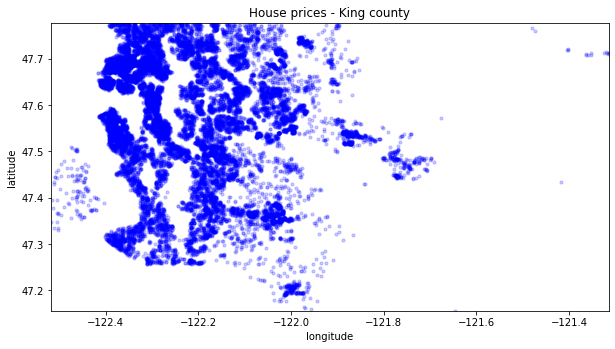

In [14]:
# Read map
mymap = plt.imread('data/map_seattle.png')

# Plot map
fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(df.longitude_coor, df.latitude_coor, zorder=1, alpha= 0.2, c='b', s=10)

# Naming - Titel, x- & y-axis
ax.set_title('House prices - King county')
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_xlim(BBox[2],BBox[3])
ax.set_ylim(BBox[0],BBox[1])

# Plot map
ax.imshow(mymap, zorder=0, extent = BBox, aspect= 'equal');

### **Numeric overview**

#### **Price**

(100000.0, 7000000.0)

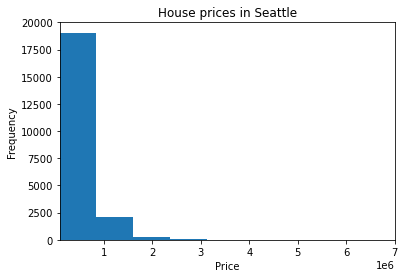

In [15]:
# Plotting
plt.hist(df.price);
# Naming
plt.title('House prices in Seattle')
plt.xlabel('Price')
plt.ylabel('Frequency')
# Scaling
plt.xlim(100000,7000000)

Text(0, 0.5, 'Price')

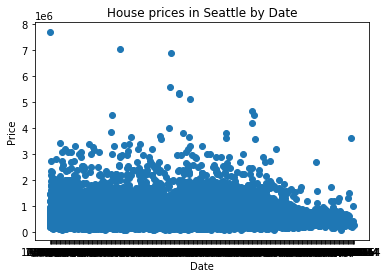

In [16]:
# Plotting
plt.scatter(y=df.price, x=df.date);

# Naming
plt.title('House prices in Seattle by Date')
plt.xlabel('Date')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

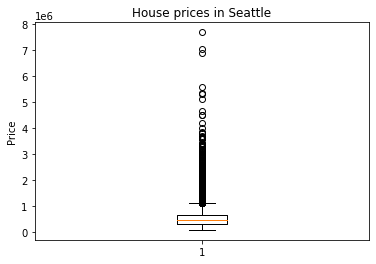

In [17]:
# Plotting
plt.boxplot(df.price);
# Naming
plt.title('House prices in Seattle')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

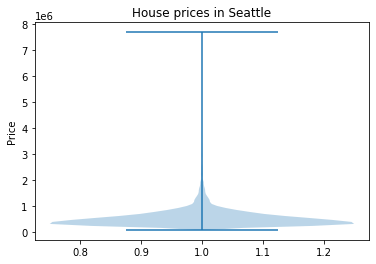

In [18]:
# Plotting
plt.violinplot(df.price);
# Naming
plt.title('House prices in Seattle')
plt.ylabel('Price')

- | Result
-----|-----
**Groups** | Not an categorical variable
**Skewness** | To the right
**Max** | max = 7.700.000
**Min** | min = 78.000
**Center of ds** | median = 450.000; mean = 540.296
**Range of values** | range = 7.622.000
**Appearance of unexpected values** | max = 7.700.000

#### **Bedrooms**

(0.0, 10.0)

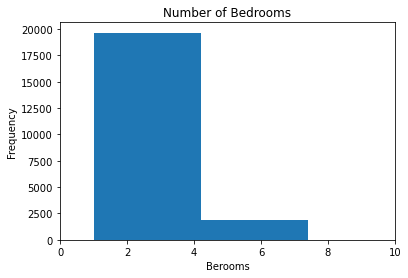

In [19]:
# Plotting
plt.hist(df.bedrooms);
# Naming
plt.title('Number of Bedrooms')
plt.xlabel('Berooms')
plt.ylabel('Frequency')
# Scaling
plt.xlim(0,10)

Text(0, 0.5, 'Price')

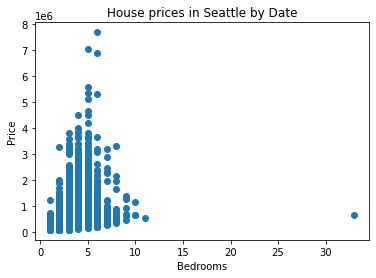

In [20]:
# Plotting
plt.scatter(y=df.price, x=df.bedrooms);

# Naming
plt.title('House prices in Seattle by Date')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
#plt.xlim(100000,7000000)

Text(0, 0.5, 'Bedrooms')

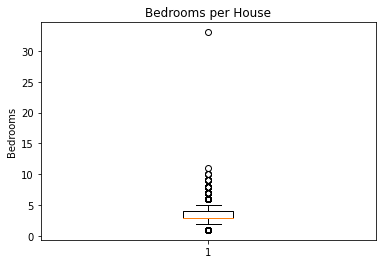

In [21]:
# Plotting
plt.boxplot(df.bedrooms);
# Naming
plt.title('Bedrooms per House')
plt.ylabel('Bedrooms')

In [22]:
#df.bedrooms.describe()

- | Result
-----|-----
**Groups** | Not an categorical variable
**Skewness** | To the right
**Max** | max = 33
**Min** | min = 1
**Center of ds** | median = 3; mean = 3.3
**Range of values** | range = 32
**Appearance of unexpected values** | max = 33 Bedrooms

#### **ZIP**

Text(0, 0.5, 'Frequency')

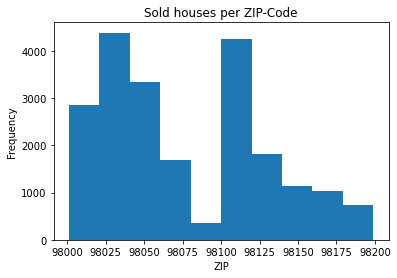

In [23]:
# Plotting
plt.hist(df.zipcode);
# Naming
plt.title('Sold houses per ZIP-Code')
plt.xlabel('ZIP')
plt.ylabel('Frequency')

Text(0, 0.5, 'Price')

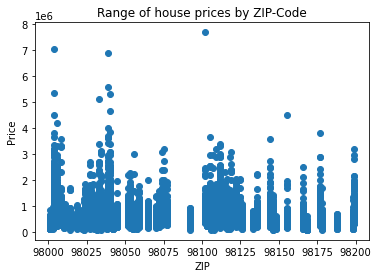

In [24]:
# Plotting
plt.scatter(y=df.price, x=df.zipcode);
# Naming
plt.title('Range of house prices by ZIP-Code')
plt.xlabel('ZIP')
plt.ylabel('Price')

Text(0, 0.5, 'ZIP')

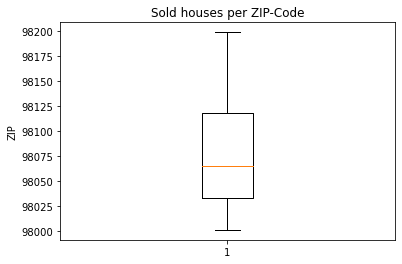

In [25]:
# Plotting
plt.boxplot(df.zipcode);
# Naming
plt.title('Sold houses per ZIP-Code')
plt.ylabel('ZIP')

- | Result
-----|-----
**Groups** | Categorical variable
**Skewness** | -
**Max** | -
**Min** | -
**Center of ds** | -
**Range of values** | -
**Appearance of unexpected values** | -

#### **Renovation**

(0.0, 2000000.0)

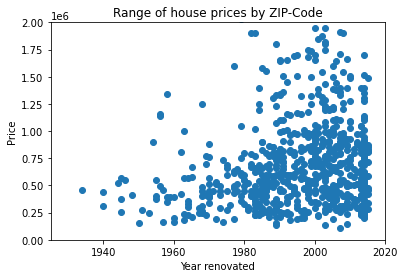

In [26]:
# Plotting
plt.scatter(y=df.price, x=df.yr_renovated);
# Naming
plt.title('Range of house prices by ZIP-Code')
plt.xlabel('Year renovated')
plt.ylabel('Price')
# Scaling
plt.xlim(1925,2020)
plt.ylim(0,2000000)

(1900.0, 2020.0)

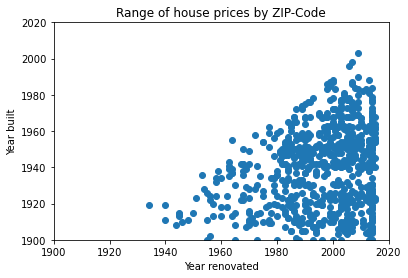

In [27]:
# Plotting
plt.scatter(y=df.yr_built, x=df.yr_renovated);
# Naming
plt.title('Range of house prices by ZIP-Code')
plt.xlabel('Year renovated')
plt.ylabel('Year built')
# Scaling
plt.xlim(1900,2020)
plt.ylim(1900,2020)

## **6.0 | Removing outliers & replotting data**

In [28]:
from scipy import stats

# Removing outliers with a 1% percentile (for bedrooms & price)
df_clean = df[(np.abs(stats.zscore(df.bedrooms)) < 1)]
df_clean = df_clean[(np.abs(stats.zscore(df_clean.price)) < 1)]

# Show max values of column
print(df_clean.bedrooms.max())
print(df_clean.price.max())
print(df_clean.bedrooms.sort_values().unique())
print(df_clean.price.sort_values().unique())

4
866800
[3 4]
[204700 204900 204950 ... 866000 866500 866800]


## **7.0 | Replotting data**

#### **Price & Bedrooms**

<AxesSubplot:>

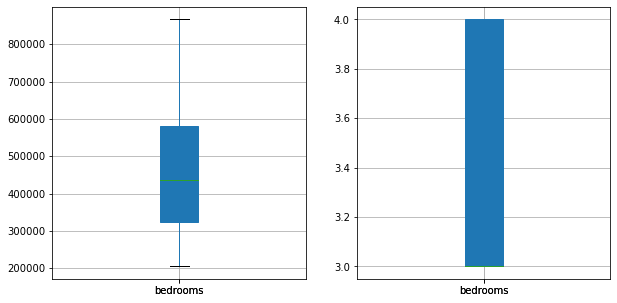

In [29]:
fig, axes = plt.subplots(ncols=2,sharex=True,sharey=False,figsize=(10,5))

df_clean.boxplot(column=['price'],ax=axes[0],patch_artist=True)
df_clean.boxplot(column=['bedrooms'],ax=axes[1],patch_artist=True)

## 8 | Feature Engineering

In [33]:
# Remove unwanted columns
df_clean.drop(columns=['sqft_living_n15', 'sqft_lot_n15'], inplace=True)

KeyError: "['sqft_living_n15' 'sqft_lot_n15'] not found in axis"

In [34]:
# Calculate prise/sqft
df_clean['price_per_sqft'] = df_clean.price / (df_clean.sqft_above + df_clean.sqft_basement)

In [35]:
# Change formate of date
pd.to_datetime(df_clean['date'])

# Create date dummies
df_clean['yr'] = pd.DatetimeIndex(df_clean['date']).year
df_clean['mo'] = pd.DatetimeIndex(df_clean['date']).month

In [41]:
# Create binary dummie for renovation status
df_clean['renovated'] = ~(df_clean.yr_renovated.isin([0]))
df_clean['renovated'] = df_clean['renovated'].replace('True',1,inplace=False)
df_clean['renovated'] = df_clean['renovated'].astype(int)

In [2]:
df_clean.head(3)

NameError: name 'df_clean' is not defined

In [52]:
# Categorise the price
serie_price = df_clean['price']
price_categorie = []
for i in serie_price:
    if i <= df_clean.price.quantile(0.75) and i >= df_clean.price.quantile(0.25):
        price_categorie.append('mid')
    elif i > df_clean.price.quantile(0.75):
        price_categorie.append('high')
    elif i < df_clean.price.quantile(0.25):
        price_categorie.append('low')
df_clean["price_cat"] = price_categorie

In [64]:
df_clean.head()

,id,date,price,bedrooms,bathrooms_per_h,sqft_living,sqft_lot,floors,waterfront,views,...,yr_built,yr_renovated,zipcode,latitude_coor,longitude_coor,price_per_sqft,yr,mo,renovated,price_cat
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,188.050847,2014,10,0,low
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,209.338521,2014,12,1,mid
3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,308.163265,2014,12,0,high
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,303.571429,2015,2,0,mid
6,1321400060,6/27/2014,257500,3,2.25,1715,6819,2.0,0,0,...,1995,0,98003,47.3097,-122.327,150.145773,2014,6,0,low


## Timing

**Assumtion regarding timing:**<br/>
Buying a house in the winter is less expensive.<br/>

Text(0.5, 1.0, 'Median house price by month in seattle')

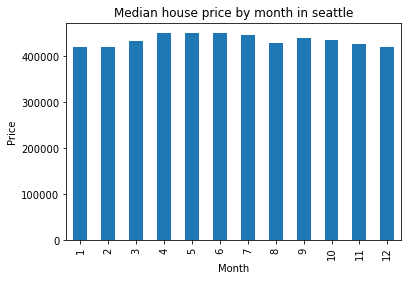

In [84]:
med_price_per_mo = df_clean.groupby(by='mo')['price'].median()
med_price_per_mo
med_price_per_mo.plot.bar(xlabel='Month', ylabel='Price');
plt.title('Median house price by month in seattle')

* **Result:** In winter months (months 1, 2, 3, 11 and 12) house prices are lower than in the other months.
* But, the evaluated data just contain sets for one year.
* To further support the statement of seasonal house prices, additional date for several years have to be investigated.

## Neighbourhood

**Assumption regarding neighbourhood:**
<br/>Within a mid price range you can afford a house in a lively neighbourhood.
<br/>
<br/> **ZIP-Codes with lively nightlife:**
* 98101
* 98104
* 98121
* Source: https://www.tripadvisor.de/Attractions-g60878-Activities-c20-t99-Seattle_Washington.html

In [144]:
# Looking for houses within a mid price range
print('Median house price: ' + str(df_clean['price'].median().astype(int)))
print('Mean house price: ' + str(df_clean['price'].mean().astype(int)))

Median house price: 436055
Mean house price: 463506


<AxesSubplot:>

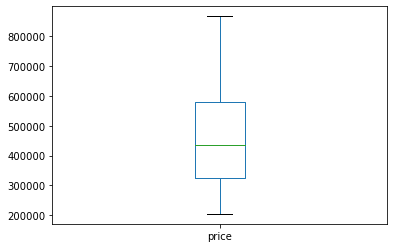

In [132]:
# View on house price in Seattle
df_clean.price.plot.box()

In [172]:
# Investigate ZIP-Codes
df_clean.zipcode.sort_values().unique()

array([98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010,
       98011, 98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029,
       98030, 98031, 98032, 98033, 98034, 98038, 98039, 98040, 98042,
       98045, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070,
       98072, 98074, 98075, 98077, 98092, 98102, 98103, 98105, 98106,
       98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119,
       98122, 98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155,
       98166, 98168, 98177, 98178, 98188, 98198, 98199])

**In the years 2014 and 2015 no houses have been solde in the 'nightlife' areas of 98101, 98104 and 98121.
Therefore, we have to move to locations around those areas.**

<center/><img src='https://realestategals.com/wp-content/uploads/2014/10/Screenshot-2014-10-22-20.31.57-257x300.png'/><center/>

**Possible bordering areas:**
* 98102
* 98109
* 98122
* 98144

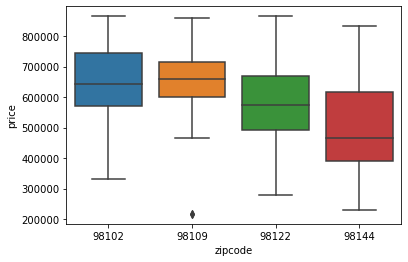

In [181]:
# Use a query to access the selection of ZIP-Codes
df_zip = df_clean.query('zipcode == 98102 or zipcode == 98109 or zipcode == 98122 or zipcode == 98144')

sns.boxplot(x='zipcode', y='price', data=df_zip);

**Level of renovation:**<br/>
Renovated houses are less expensive than houses built within the last 5 years.



*Lively, central neighbourhood, middle price range, right timing (within a year)*



## Recommendation

1. Buy during the winter because prices are slightly lower.
2. Buy in the area of 98144, due to the lower price level.

## Future exploration work / Outlook

* Deepdive into the seasonality of house prices with additional data.
* Categorize ZIP codes in lively urban areas and suburban areas.
* Renovation
* ...